In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing required packages**

In [5]:
import keras
from keras.models import Sequential  #for ANN,CNNN AND RNN
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Sequential is a fundamental class in Keras (now part of TensorFlow) used for building linear stack models of neural networks. It allows you to create a neural network by adding layers one by one in a sequential manner. Each layer is connected to the next one, forming a feedforward neural network.

In [6]:
import ipywidgets as widgets # for image classification
import io  #input output module
from PIL import Image #PIL= Public image library 
import tqdm
from sklearn.model_selection import train_test_split
import cv2 #replacement of open cv or new name of open cv used to deal with images
from sklearn.utils import shuffle #because only train test split will not be enough we need to shuffle data
import tensorflow as tf

ipywidgets: This library provides interactive widgets for the Jupyter Notebook and JupyterLab environments. It allows you to create GUI elements like sliders, buttons, text boxes, etc., to make your notebooks more interactive and user-friendly.

io: This module provides Python's core tools for working with I/O (input/output). It allows you to read and write data from different sources, such as files, network connections, and in-memory streams.

PIL (Python Imaging Library): PIL is a popular Python library for working with images. However, since Python 3.1, PIL has been replaced by its fork called "Pillow," which provides additional features and ongoing support. It's used here for image processing.

tqdm: This is a progress bar library that provides a visual representation of the progress of a loop or an operation, making it easier to track the completion status.

train_test_split: This function is part of the sklearn.model_selection module in scikit-learn, a popular machine learning library. It is used to split a dataset into training and testing sets, allowing you to evaluate the performance of a machine learning model.

cv2: OpenCV is a computer vision library used for various image and video processing tasks. In this case, cv2 is likely referring to the OpenCV Python module.

shuffle: This function is part of the sklearn.utils module in scikit-learn. It is used to randomly shuffle the data in arrays or datasets to avoid any bias during model training.

tensorflow (imported as tf): TensorFlow is a popular deep learning library developed by Google. It provides a flexible and efficient framework for building and training neural networks.

**Folder path**

In [7]:
X_train = []
Y_train = []  #X_train and Y_train are initialized as empty lists to store the images and labels,
image_size = 150  #image_size is set to 150, which means the images will be resized to 150x150 pixels.
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']  #labels is a list containing the names of the four classes: 'glioma_tumor', 'meningioma_tumor', 'no_tumor', and 'pituitary_tumor'.
for i in labels:    #
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
#The first loop iterates over the labels list and processes the images in the Training directory for each label. For each image in a particular class folder,
#it reads the image using cv2.imread(), resizes it to the specified image_size, and then appends the image to X_train and the corresponding label (class name) to Y_train.        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
#The second loop performs a similar operation for the images in the Testing directory. The images from the testing set are added to the X_train and their corresponding labels to Y_train.        
X_train = np.array(X_train)
Y_train = np.array(Y_train) #after loading and processing all the images, X_train and Y_train are converted to NumPy arrays using np.array().

In above code we are saving all input image from training and testing folder into x and y train only to remove some kind of bias in the image. we will be creating train test split by suffling images.

In [8]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101) 
X_train.shape #shape is not a function thatswhy no parenthesis()

(3264, 150, 150, 3)

The shuffle function ensures that the order of images and labels is randomized, which helps in avoiding any potential biases during model training. we are suffling x train and y train together to ensure that the images and their corresponding labels remain aligned after the randomization. 
we should choose randome state value as high as possible to ensure good number of suffling 

In shape(3264, 150, 150, 3)
The first element 3264, indicates that you have 3264 images in the training set. The second and third elements, 150 and 150, denote the height and width of each image, respectively. The last element, 3, represents the number of color channels in the image (assuming the images are RGB images; it would be 1 for grayscale images).

**Train test split**

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

we are taking test size of 10 percent only as our sample size of image is low, random state wil ensure that train test split is not bias towards one kind of feature

In training x train values are images converted to array while y train values are labels like types of cancer 

In code below we will be converting the labels index (formed in the above code) into the categorical variables for both y train and y test

In [10]:
y_train_new = []  #y_train_new and y_test_new are initialized as empty lists to store the encoded labels
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

#The first loop iterates over each element in y_train, which contains the class names (e.g., 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor').
Inside the loop, the index of each class name in the labels list is obtained using the index method. This index represents the numerical representation of the class. For example, if 'meningioma_tumor' has an index of 1 in the labels list, then the corresponding element in y_train_new will be 1.
After processing all elements in y_train, the variable y_train_new now contains the numerical representations of the class labels.

tf.keras.utils.to_categorical function is used to convert these numerical representations into one-hot encoded vectors. This function takes the numerical labels (e.g., [0, 1, 2, 3]) and converts them into binary vectors. For example, if the numerical label is 1, the corresponding one-hot encoded vector would be [0, 1, 0, 0], where the 1 is placed at the index corresponding to the class 'meningioma_tumor'.

**Convulational Neural Network**

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2)) #MaxPooling2D layer with a pool size of 2x2, which reduces the spatial dimensions of the output.
model.add(Dropout(0.3))  #Dropout layer is added with a rate of 0.3 (30 percent), which helps in preventing overfitting during training
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())  #Flatten layer is added to flatten the 3D feature maps into a 1D vector to prepare for the fully connected layers.
model.add(Dense(512,activation = 'relu'))  #dense layers serve as the fully connected part of the neural network.
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax')) #4 because we have four feature
#The softmax activation function is commonly used for multi-class classification problems, as it converts the model's raw output into probability scores for each class.

'add' function is used to adding a layer

the above model is inspired from vgg neural network that uses 16 layer of convulation layer

Conv2D(32,(3,3)- first layer is a Conv2D layer with 32 filters of size 3x3

Here are some guidelines to help you make these decisions:

Number of Filters (Depth):
The number of filters determines the depth of your CNN architecture. More filters allow the network to learn more complex and higher-level features.
In the early layers, you typically start with a smaller number of filters (e.g., 32 or 64) and gradually increase it in deeper layers (e.g., 128, 256, etc.).
Very deep architectures may require more computational resources and may be prone to overfitting if not handled properly.
A good practice is to start with a relatively shallow architecture and gradually increase the depth while monitoring the model's performance.

Filter Size:
The filter size (also called kernel size) determines the receptive field of each convolutional operation. Smaller filter sizes focus on capturing local patterns, while larger filter sizes capture more global patterns.
Common filter sizes are 3x3 and 5x5. A 3x3 filter is widely used due to its simplicity and computational efficiency.
Smaller filter sizes help in learning fine-grained features, and larger filter sizes help in capturing more context and larger patterns.
If you have limited computational resources, using smaller filter sizes may be preferable.


In [12]:
model.summary()  #summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

Now we will compile the model into one to be easy to use

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

loss parameter specifies the loss function to be minimized during training. categorical_crossentropy' is used, which is a common loss function for multi-class classification problems with one-hot encoded class labels. It measures the dissimilarity between the predicted probability distribution and the true one-hot encoded labels.

optimizer='Adam': The optimizer parameter determines the optimization algorithm used to update the model's weights during training. 'Adam' is a popular optimization algorithm that combines the benefits of the AdaGrad and RMSprop algorithms. It adapts the learning rates for each parameter during training, making it well-suited for a wide range of deep learning tasks.

metrics=['accuracy']: The metrics parameter specifies the evaluation metrics to monitor during training and testing. In this case, ['accuracy'] is used, which means that the model's accuracy (the proportion of correctly classified samples) will be tracked during training.

After compiling the model, you can proceed to train it using the fit() method and the training data

In [14]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30


2023-08-06 06:37:08.850935: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 19s 71ms/step - loss: 280.7588 - accuracy: 0.3840 - val_loss: 364.0409 - val_accuracy: 0.4626
Epoch 2/30
83/83 [==============================] - 5s 56ms/step - loss: 1423.2413 - accuracy: 0.3008 - val_loss: 31821.8203 - val_accuracy: 0.2993
Epoch 3/30
83/83 [==============================] - 5s 56ms/step - loss: 9963.1250 - accuracy: 0.2853 - val_loss: 16731.6289 - val_accuracy: 0.2721
Epoch 4/30
83/83 [==============================] - 5s 57ms/step - loss: 28223.7734 - accuracy: 0.2807 - val_loss: 2323151.0000 - val_accuracy: 0.2721
Epoch 5/30
83/83 [==============================] - 5s 56ms/step - loss: 809.5284 - accuracy: 0.2876 - val_loss: 1020382.1250 - val_accuracy: 0.1599
Epoch 6/30
83/83 [==============================] - 5s 56ms/step - loss: 907.4365 - accuracy: 0.2698 - val_loss: 581135.1250 - val_accuracy: 0.1599
Epoch 7/30
83/83 [==============================] - 5s 56ms/step - loss: 34.1142 - accuracy: 0.2841 - val_loss: 479173.50

The model.fit() function returns a History object that contains information about the training process, including the loss and accuracy values for both training and validation data after each epoch. 

The epochs parameter specifies the number of times the entire training dataset will be passed through the model during training. Each epoch consists of one forward pass (input to output) and one backward pass (computing gradients for weight updates).

validation_split=0.1: The validation_split parameter allows you to set aside a portion of the training data as validation data to monitor the model's performance during training. In this case, 10% of the training data will be used for validation, while the remaining 90% will be used for training.

**saving the trained model and extracting the training and validation accuracy history from the history object returned by model.fit()**

In [15]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc)) #This line creates a range of integers starting from 0 to the length of the acc list (which is the number of epochs). It is used as the x-axis values when plotting the training and validation accuracy.

**Visualize the training progress and model performance by plotting the training and validation accuracy over epochs using matplotlib**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

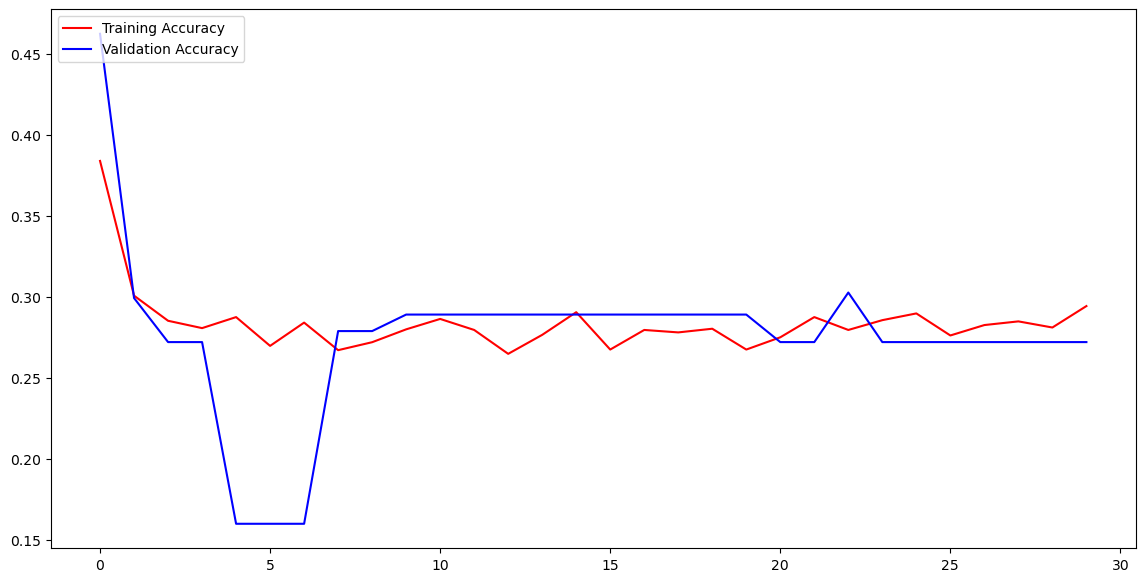

In [18]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

**Visualize the training progress and model performance by plotting the training and validation loss over epochs using matplotlib**

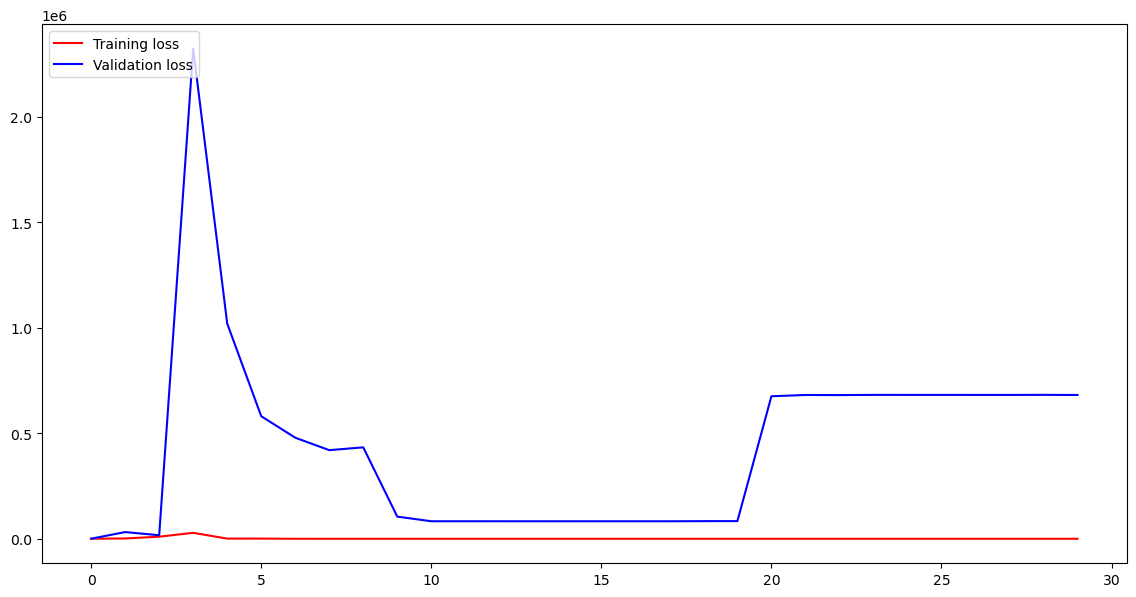

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

**Prediction**

In [20]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))  #resizes the image to a shape of (150, 150) using the cv2.resize()
img_array = np.array(img)  # converts the resized image (previously a NumPy array) into another NumPy array named img_array
img_array.shape

(150, 150, 3)

cv2.imread reads an image from the specified file path.cv2.imread() function returns a NumPy array representing the image in BGR format.

The shape (150, 150, 3) indicates that the image is 150 pixels in height, 150 pixels in width, and has three color channels (RGB), making it a 3D NumPy array.


**convert into 4D array**

In [21]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

Reshaping operation converts the 3D NumPy array representing the image into a 4D array with an additional dimension.this is done to make it in acoordance to our model

First dimension (1): This dimension indicates the number of samples in the data. In this case, it's set to 1, as you have a single image.

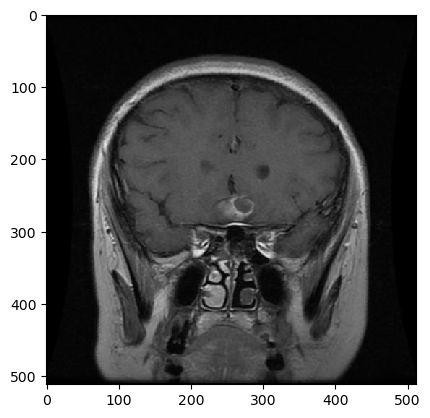

In [26]:
from tensorflow.keras.preprocessing import image  #image module provides various utility functions for image preprocessing and augmentation.
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')  #The image is loaded as a PIL (Python Imaging Library) Image object.
plt.imshow(img,interpolation='nearest') #imshow() function is used to show images, and the loaded PIL Image object (img) is passed as the first argument

plt.show()  #show() function is necessary to actually render the image on the screen.

interpolation='nearest' parameter ensures that the image is displayed without interpolation, meaning that each pixel corresponds to a single pixel in the image.

In [27]:
a=model.predict(img_array) #output 'a' will be a NumPy array representing the predicted probabilities for each class.
indices = a.argmax()  
indices

1/1 [==============================] - 0s 296ms/step


1

#argmax() function returns the index of the maximum value in the a array.it determines the class with the highest predicted probability among the different classes.